# Data Analysis of Bike Sharing Datasetss

- **Name:** Faris Munir Mahdi
- **Email:** 21081010064@student.upnjatim.ac.id
- **Dicoding ID:** farismnrr

### Defining Business Questions

1. What factors contribute to the number of bike rentals, and how do they impact rental rates?
2. Based on demand patterns, when is the optimal time to increase the number of bikes?

### Importing All Required Packages and Libraries

In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Data Wrangling

#### Gathering Data

1. Load the data

In [2]:
hourly_data = pd.read_csv("data/hour.csv")
daily_data = pd.read_csv("data/day.csv")

2. Brief preprocessing before merging

In [3]:
hourly_data['dteday'] = pd.to_datetime(hourly_data['dteday'])
daily_data['dteday'] = pd.to_datetime(daily_data['dteday'])

In [4]:
print(hourly_data.columns)
print(daily_data.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


3. Add a column for day names (e.g., "Monday")

In [5]:
hourly_data['day_name'] = hourly_data['dteday'].dt.day_name()
daily_data['day_name'] = daily_data['dteday'].dt.day_name()

In [6]:
hourly_data['year_month'] = hourly_data['dteday'].dt.to_period('M')
daily_data['year_month'] = daily_data['dteday'].dt.to_period('M')

In [7]:
print("Hourly Data (First 5 Rows):")
print(hourly_data.head())

print("\nDaily Data (First 5 Rows):")
print(daily_data.head())

Hourly Data (First 5 Rows):
   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

   day_name year_month  
0  Saturday    2011-01  
1  Saturday    2011-

4. Save the processed dataframe into a new variable.

In [8]:
hourly_data_gathered = hourly_data
daily_data_gathered = daily_data

**Insight**:

- **Granularity at Two Levels**:
The dataset provides information at two levels of granularity: hourly records and daily aggregates. The availability of these two datasets facilitates an in-depth exploration of bike rental patterns across different temporal scales, enabling the identification of both overarching daily trends and intra-day fluctuations.

- **Precise Date Representation**:
The `dteday` column in both datasets has been converted to the datetime data type. This conversion is essential for time series analysis, ensuring the accuracy of time-dependent operations and temporal groupings.

- **Temporal Feature Extraction**:
The *day_name* (day of the week) and *year_month** (year-month) columns have been derived from the *dteday* column. These additional features enhance the dataset by enabling trend analyses based on weekly patterns, as well as seasonal and annual variations.

- **Daily Data as an Aggregate**:
The daily dataset (*day.csv*) is fundamentally an aggregated form of the hourly dataset (*hour.csv*). Consequently, merging these datasets is unnecessary and may introduce redundancy. Analytical processes can be conducted independently for each dataset, depending on the required level of granularity.

#### Assessing Data

1. Check missing values

In [9]:
print("Missing values in hourly_data:")
print(hourly_data.isnull().sum())

print("\nMissing values in daily_data:")
print(daily_data.isnull().sum())

Missing values in hourly_data:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day_name      0
year_month    0
dtype: int64

Missing values in daily_data:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day_name      0
year_month    0
dtype: int64


2. Check data types

In [10]:
print("Data types of hourly_data:")
print(hourly_data.dtypes)

print("\nData types of daily_data:")
print(daily_data.dtypes)

Data types of hourly_data:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
day_name              object
year_month         period[M]
dtype: object

Data types of daily_data:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casu

3. Check inconsistent values

In [11]:
print("Unique values in hourly_data:")
for col in ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']:
    print(f"{col}: {hourly_data[col].unique()}")

print("\nUnique values in daily_data:")
for col in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']: 
   print(f"{col}: {daily_data[col].unique()}")

Unique values in hourly_data:
season: [1 2 3 4]
yr: [0 1]
mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
hr: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
holiday: [0 1]
weekday: [6 0 1 2 3 4 5]
workingday: [0 1]
weathersit: [1 2 3 4]

Unique values in daily_data:
season: [1 2 3 4]
yr: [0 1]
mnth: [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday: [0 1]
weekday: [6 0 1 2 3 4 5]
workingday: [0 1]
weathersit: [2 1 3]


In [12]:
print("Minimum values in hourly_data (casual, registered, cnt):")
print(hourly_data[['casual', 'registered', 'cnt']].min())

print("\nMinimum values in daily_data (casual, registered, cnt):")
print(daily_data[['casual', 'registered', 'cnt']].min())

Minimum values in hourly_data (casual, registered, cnt):
casual        0
registered    0
cnt           1
dtype: int64

Minimum values in daily_data (casual, registered, cnt):
casual         2
registered    20
cnt           22
dtype: int64


4. Check outliers

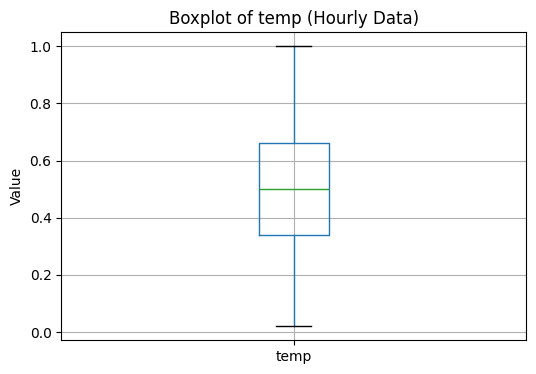

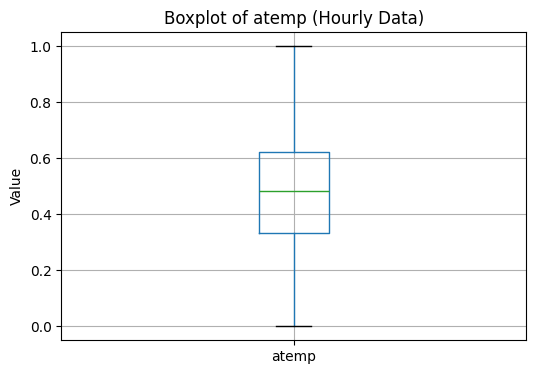

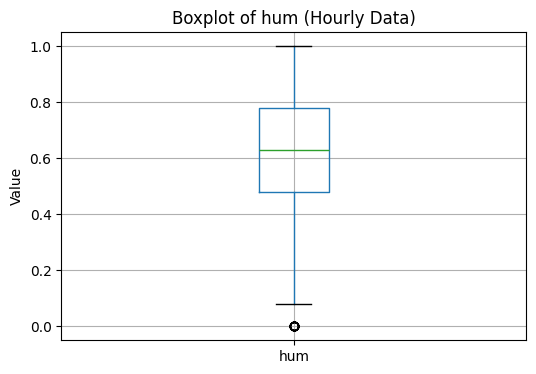

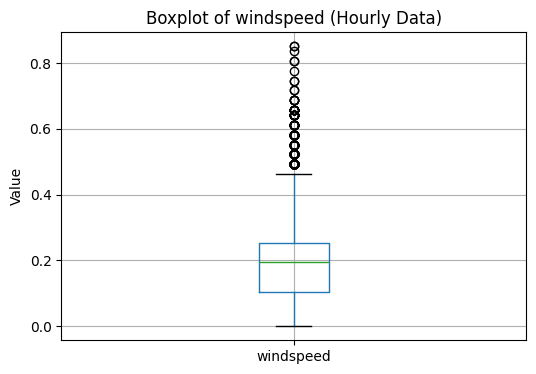

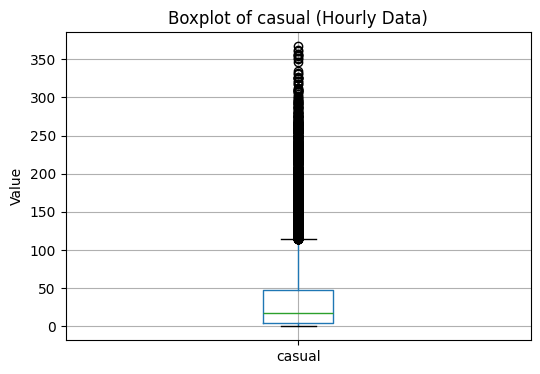

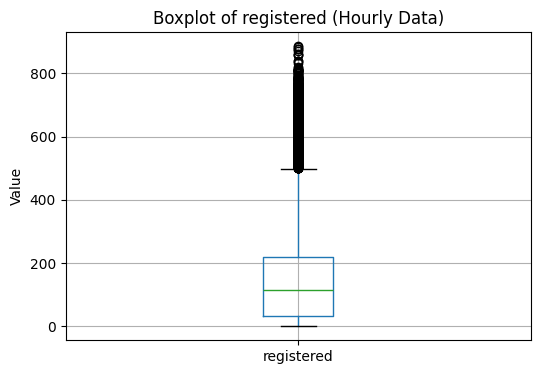

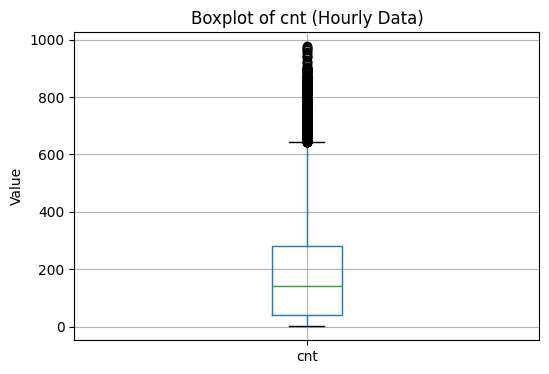

In [13]:
# List of numerical columns for hourly_data (excluding 'instant')
numerical_cols_hourly = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Create boxplots for each numerical column in hourly_data
for col in numerical_cols_hourly:
    plt.figure(figsize=(6, 4))
    hourly_data.boxplot(column=col)
    plt.title(f'Boxplot of {col} (Hourly Data)')
    plt.ylabel('Value')
    plt.show()

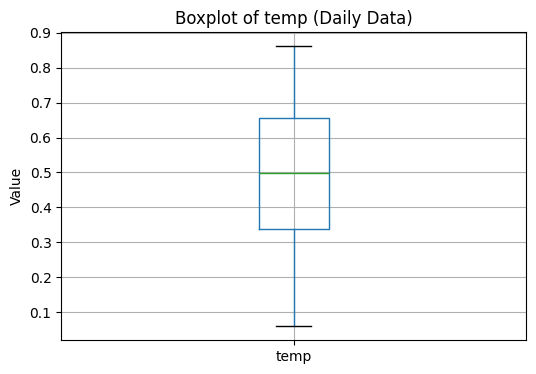

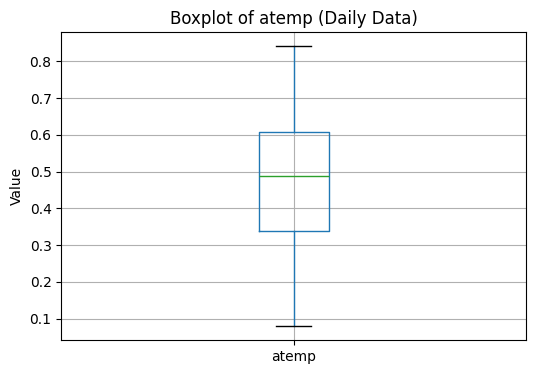

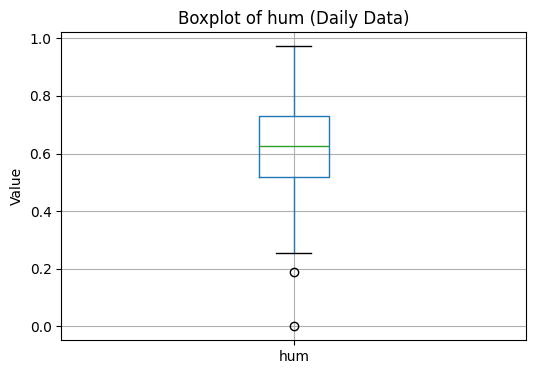

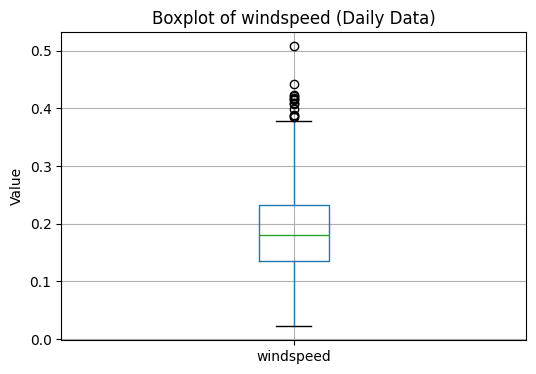

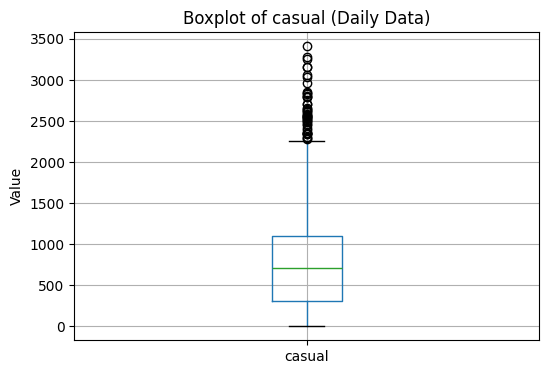

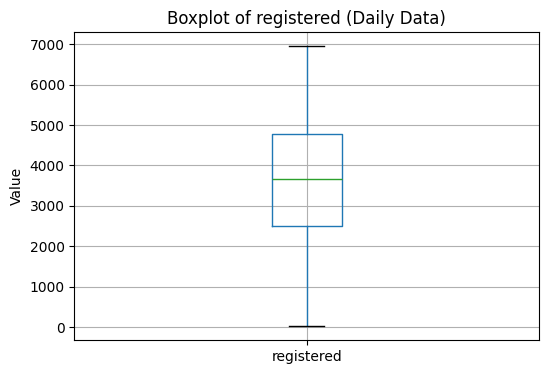

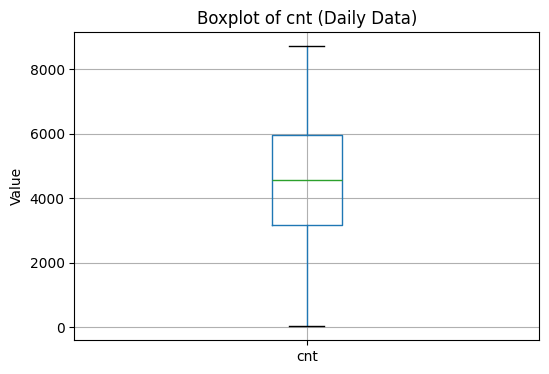

In [14]:
# List of numerical columns for daily_data (excluding 'instant')
numerical_cols_daily = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Create boxplots for each numerical column in daily_data
for col in numerical_cols_daily:
    plt.figure(figsize=(6, 4))
    daily_data.boxplot(column=col) 
    plt.title(f'Boxplot of {col} (Daily Data)')
    plt.ylabel('Value')
    plt.show()

5. Check duplicate rows

In [15]:
print("Duplicated rows in hourly_data:", hourly_data.duplicated().sum())
print("Duplicated rows in daily_data:", daily_data.duplicated().sum())

Duplicated rows in hourly_data: 0
Duplicated rows in daily_data: 0


#### Cleaning Data

1. Create copies to avoid modifying original DataFrames

In [16]:
hourly_data_cleaned = hourly_data.copy()
daily_data_cleaned = daily_data.copy()

2. Outlier handling (Winsorization). Cap and floor at 1st and 99th percentiles.

In [17]:
for col in ['casual', 'registered', 'cnt']:  # Both DataFrames have these columns
    # Hourly data
    lower_limit = hourly_data_cleaned[col].quantile(0.01)
    upper_limit = hourly_data_cleaned[col].quantile(0.99)
    hourly_data_cleaned[col] = hourly_data_cleaned[col].clip(lower=lower_limit, upper=upper_limit)

    # Daily data
    lower_limit = daily_data_cleaned[col].quantile(0.01)
    upper_limit = daily_data_cleaned[col].quantile(0.99)
    daily_data_cleaned[col] = daily_data_cleaned[col].clip(lower=lower_limit, upper=upper_limit)

3. Cleaned data verification

In [18]:
print("\nMissing values in cleaned hourly data:")
print(hourly_data_cleaned.isnull().sum())
print("\nMissing values in cleaned daily data:")
print(daily_data_cleaned.isnull().sum())


Missing values in cleaned hourly data:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day_name      0
year_month    0
dtype: int64

Missing values in cleaned daily data:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day_name      0
year_month    0
dtype: int64


In [19]:
print("\nData types of cleaned hourly data:")
print(hourly_data_cleaned.dtypes)


Data types of cleaned hourly data:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered           float64
cnt                  float64
day_name              object
year_month         period[M]
dtype: object


In [20]:
print("\nData types of cleaned daily data:")
print(daily_data_cleaned.dtypes)


Data types of cleaned daily data:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual               float64
registered           float64
cnt                  float64
day_name              object
year_month         period[M]
dtype: object


4. Cleaned data visualization

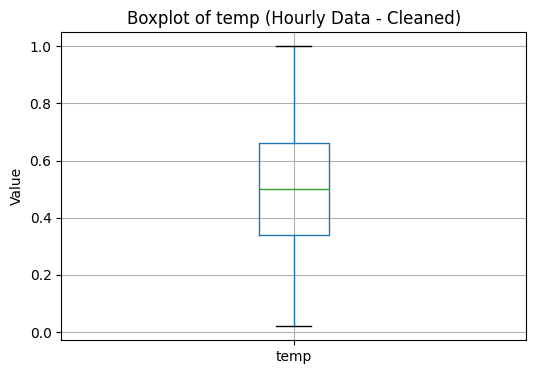

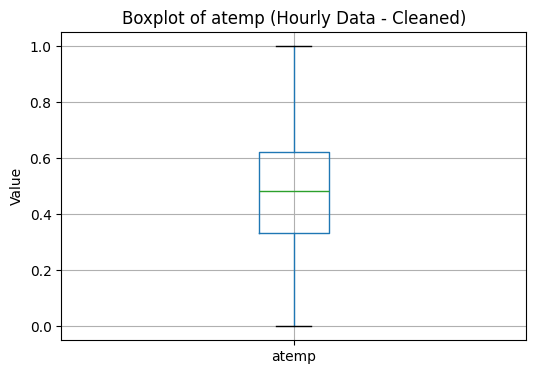

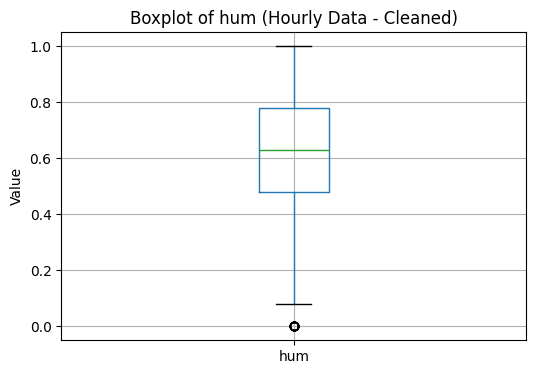

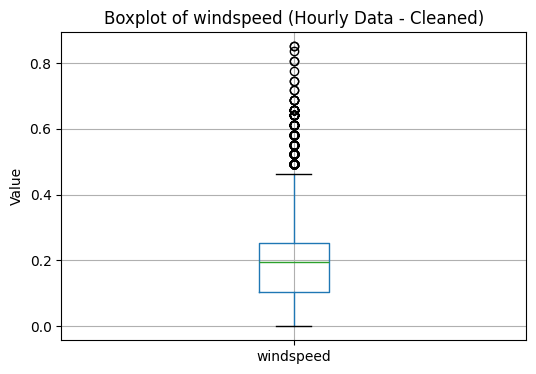

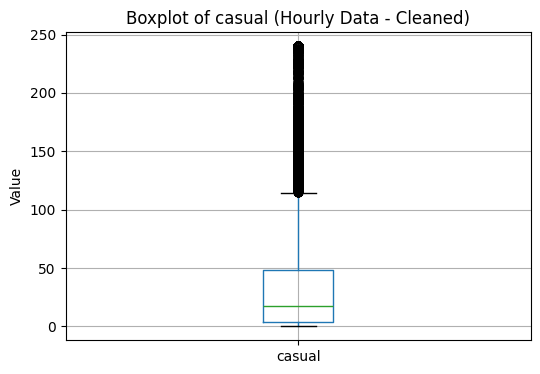

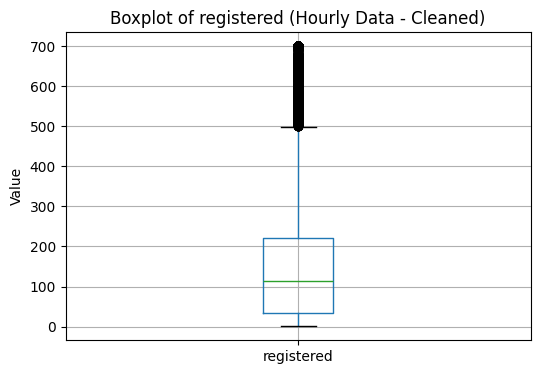

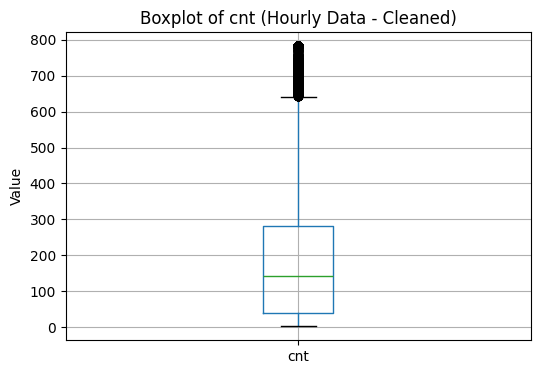

In [21]:
# Boxplots for hourly_data (cleaned)
numerical_cols_hourly = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in numerical_cols_hourly:
    plt.figure(figsize=(6, 4))
    hourly_data_cleaned.boxplot(column=col)
    plt.title(f'Boxplot of {col} (Hourly Data - Cleaned)')
    plt.ylabel('Value')
    plt.show()

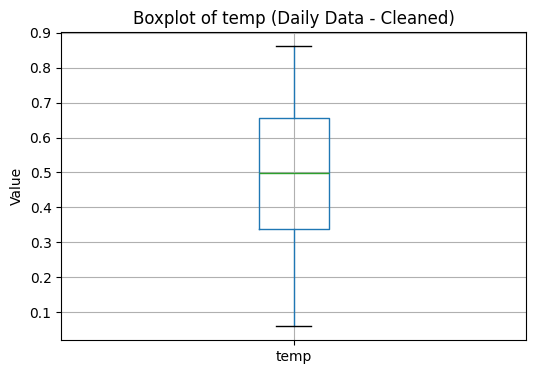

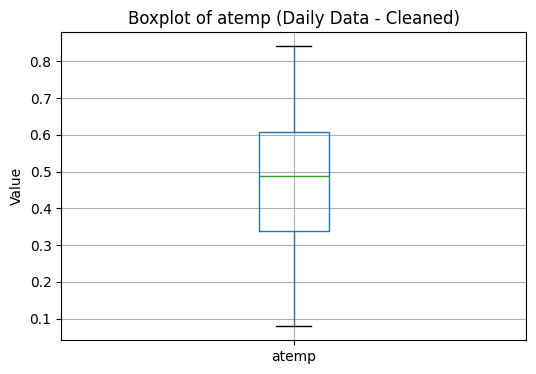

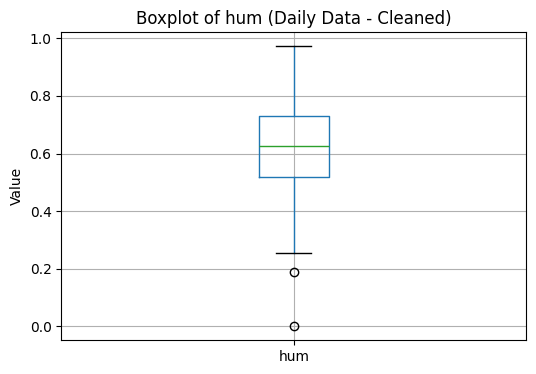

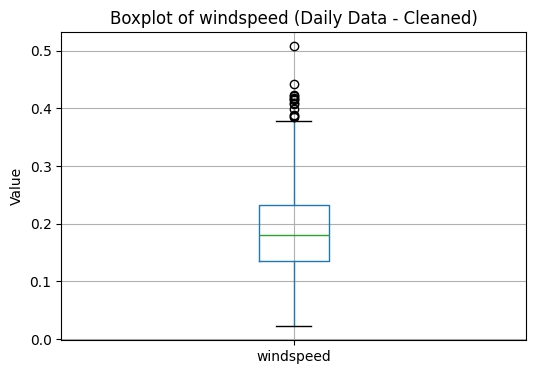

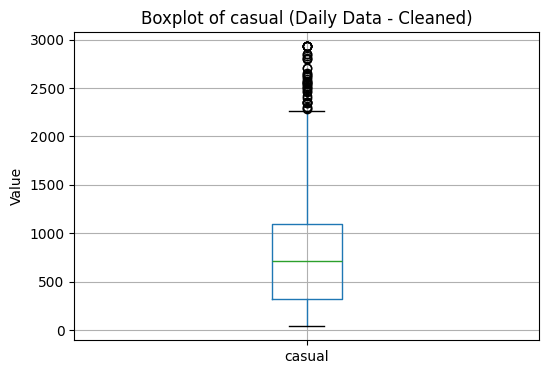

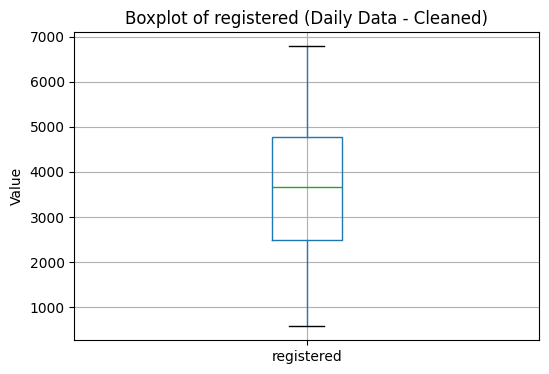

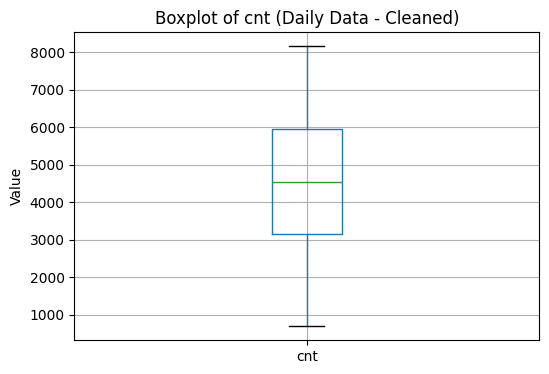

In [22]:
# Boxplots for daily_data (cleaned)
numerical_cols_daily = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in numerical_cols_daily:
    plt.figure(figsize=(6, 4))
    daily_data_cleaned.boxplot(column=col)
    plt.title(f'Boxplot of {col} (Daily Data - Cleaned)')
    plt.ylabel('Value')
    plt.show()

5. Save the cleaned data into a new variable.

In [23]:
hourly_data_clean = hourly_data_cleaned
daily_data_clean = daily_data_cleaned
print(hourly_data_cleaned.head())
print(daily_data_cleaned.head())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered   cnt  \
0           1  0.24  0.2879  0.81        0.0       3        13.0  16.0   
1           1  0.22  0.2727  0.80        0.0       8        32.0  40.0   
2           1  0.22  0.2727  0.80        0.0       5        27.0  32.0   
3           1  0.24  0.2879  0.75        0.0       3        10.0  13.0   
4           1  0.24  0.2879  0.75        0.0       0         1.0   2.0   

   day_name year_month  
0  Saturday    2011-01  
1  Saturday    2011-01  
2  Saturday    20

### Exploratory Data Analysis (EDA)

#### Data Analysis

1.  Correlations with 'cnt'

In [24]:
print("\nCorrelations with 'cnt' (Hourly Data):")
correlations = hourly_data_cleaned[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
print(correlations['cnt'].sort_values(ascending=False))


Correlations with 'cnt' (Hourly Data):
cnt           1.000000
registered    0.971729
casual        0.704961
temp          0.406293
atemp         0.402535
windspeed     0.093961
hum          -0.324241
Name: cnt, dtype: float64


2.  Average rentals per hour of the day

In [25]:
hourly_avg_rentals = hourly_data_cleaned.groupby('hr')['cnt'].mean().reset_index()
print("\nAverage Bike Rentals per Hour:")
print(hourly_avg_rentals)


Average Bike Rentals per Hour:
    hr         cnt
0    0   53.898072
1    1   33.382597
2    2   22.897902
3    3   11.796270
4    4    6.443329
5    5   19.909344
6    6   76.052414
7    7  212.067400
8    8  358.451884
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.982493
17  17  452.239616
18  18  420.238489
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044


3. Average rentals per day of the week

In [26]:
daily_avg_rentals = hourly_data_cleaned.groupby('day_name')['cnt'].mean().reset_index()

In [27]:
# Day order (Monday to Sunday)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg_rentals = daily_avg_rentals.set_index('day_name').loc[days].reset_index() 
print("\nAverage Bike Rentals per Day of the Week:")
print(daily_avg_rentals)


Average Bike Rentals per Day of the Week:
    day_name         cnt
0     Monday  183.053086
1    Tuesday  190.298467
2  Wednesday  189.786222
3   Thursday  195.378891
4     Friday  195.781335
5   Saturday  190.215056
6     Sunday  177.476019


4. Total rentals per month (for trend analysis)

In [28]:
monthly_rentals = hourly_data_cleaned.groupby('year_month')['cnt'].sum().reset_index()
monthly_rentals['year_month'] = monthly_rentals['year_month'].astype(str)
print("\nTotal Bike Rentals per Month:")
print(monthly_rentals)


Total Bike Rentals per Month:
   year_month        cnt
0     2011-01   38223.00
1     2011-02   48234.00
2     2011-03   64069.00
3     2011-04   94878.00
4     2011-05  135823.00
5     2011-06  143514.00
6     2011-07  141342.00
7     2011-08  136694.00
8     2011-09  127420.00
9     2011-10  123515.00
10    2011-11  102169.00
11    2011-12   87331.00
12    2012-01   96754.00
13    2012-02  103152.00
14    2012-03  164576.32
15    2012-04  174135.66
16    2012-05  195355.86
17    2012-06  201883.62
18    2012-07  202445.40
19    2012-08  212340.92
20    2012-09  215278.58
21    2012-10  196346.92
22    2012-11  152667.00
23    2012-12  123718.00


5. Value Counts per categorical feature

In [29]:
categorical_features = ['season','holiday','workingday', 'weathersit']
for col in categorical_features:
    if col in hourly_data_cleaned.columns: 
      print(f"\nValue Counts for {col} (Hourly Data):")
      print(hourly_data_cleaned[col].value_counts())


Value Counts for season (Hourly Data):
season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

Value Counts for holiday (Hourly Data):
holiday
0    16879
1      500
Name: count, dtype: int64

Value Counts for workingday (Hourly Data):
workingday
1    11865
0     5514
Name: count, dtype: int64

Value Counts for weathersit (Hourly Data):
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64


#### Data Visualization

--- Question 1: Factors contributing to bike rentals ---

1. Distribution of the target variable (cnt)

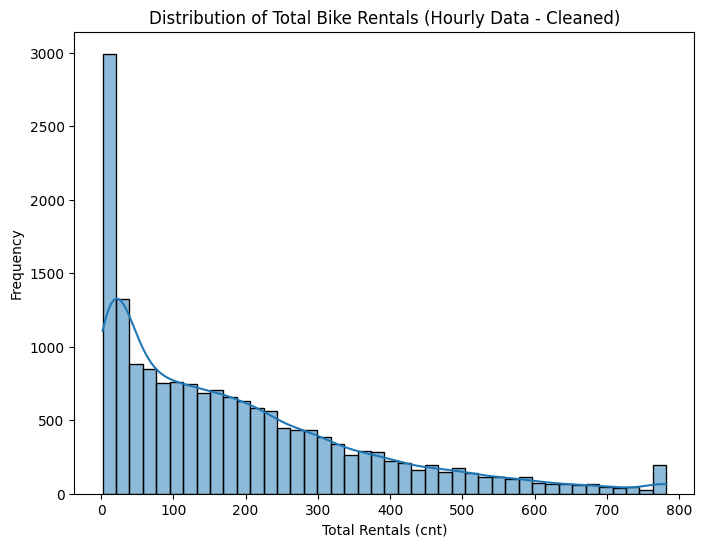

In [30]:
# Histogram to show the overall distribution of total rentals.
plt.figure(figsize=(8, 6))
sns.histplot(hourly_data_clean['cnt'], kde=True)  
plt.title('Distribution of Total Bike Rentals (Hourly Data - Cleaned)')
plt.xlabel('Total Rentals (cnt)')
plt.ylabel('Frequency')
plt.show()

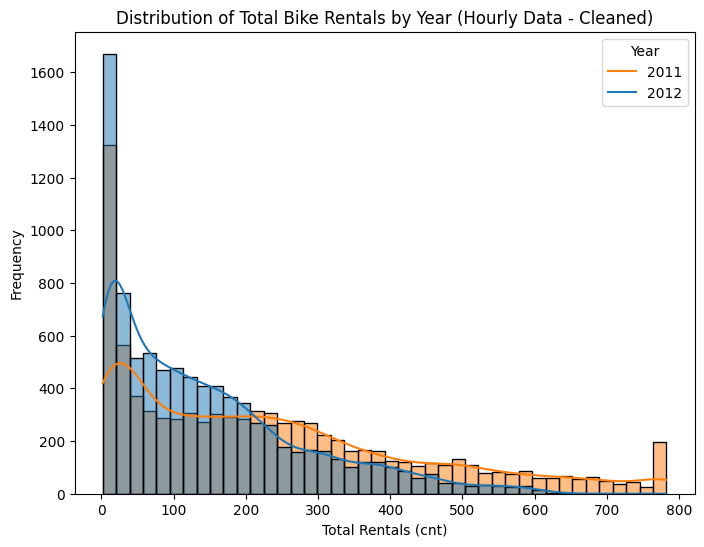

In [31]:
# Histogram of total rentals, separated by year.
plt.figure(figsize=(8, 6))
sns.histplot(data=hourly_data_clean, x='cnt', hue='yr', kde=True, multiple='layer')
plt.title('Distribution of Total Bike Rentals by Year (Hourly Data - Cleaned)')
plt.xlabel('Total Rentals (cnt)')
plt.ylabel('Frequency')
plt.legend(title='Year', labels=['2011', '2012'])  
plt.show()

2. Exploring Relationships with Categorical Features

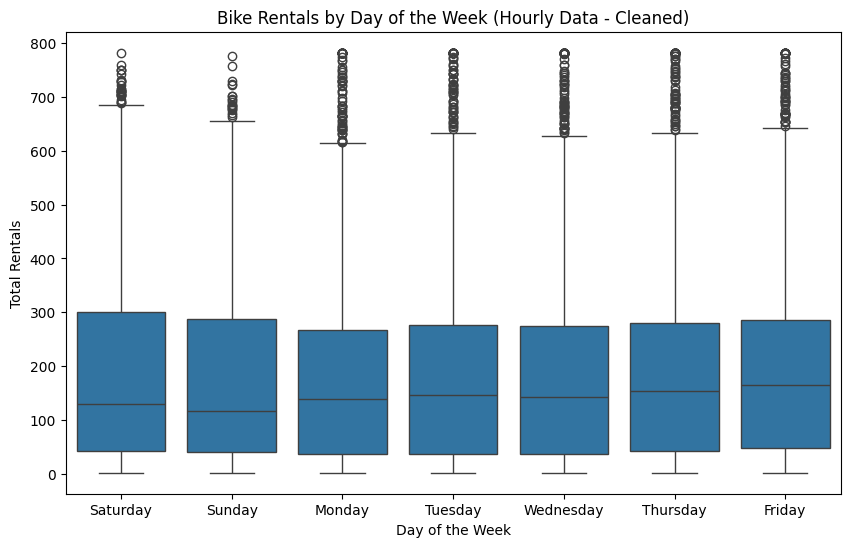

In [32]:
# Boxplot to show the distribution of rentals for each day of the week.
plt.figure(figsize=(10, 6))
sns.boxplot(data=hourly_data_clean, x='day_name', y='cnt')
plt.title('Bike Rentals by Day of the Week (Hourly Data - Cleaned)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rentals')
plt.show()

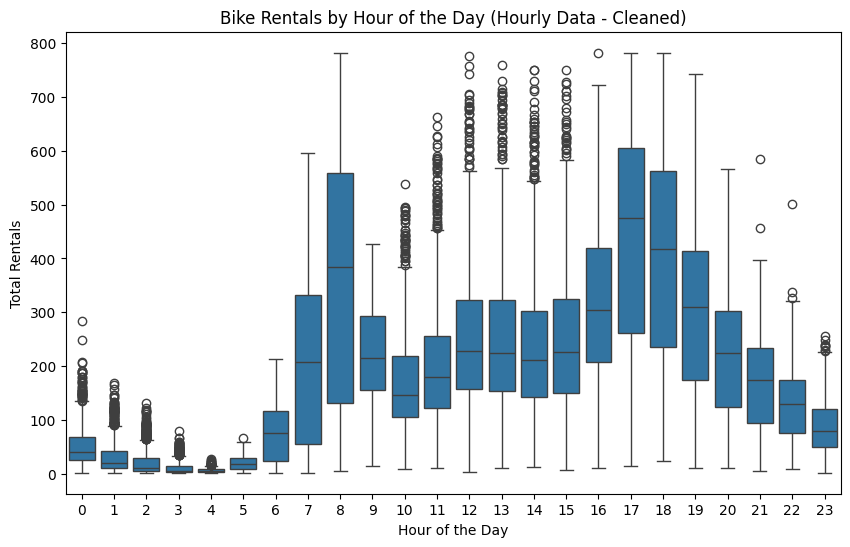

In [33]:
# Boxplot to show the distribution of rentals for each hour of the day.
plt.figure(figsize=(10, 6))
sns.boxplot(data=hourly_data_cleaned, x='hr', y='cnt')
plt.title('Bike Rentals by Hour of the Day (Hourly Data - Cleaned)')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.show()

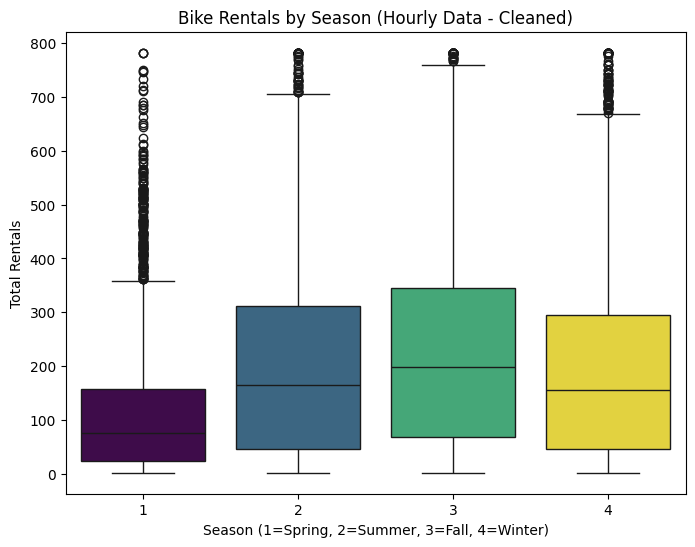

In [34]:
# Boxplot to show the distribution of rentals for each season.
plt.figure(figsize=(8, 6))
sns.boxplot(data=hourly_data_cleaned, x='season', y='cnt', hue='season', palette="viridis", legend=False)
plt.title('Bike Rentals by Season (Hourly Data - Cleaned)')
plt.xlabel('Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)')
plt.ylabel('Total Rentals')
plt.show()

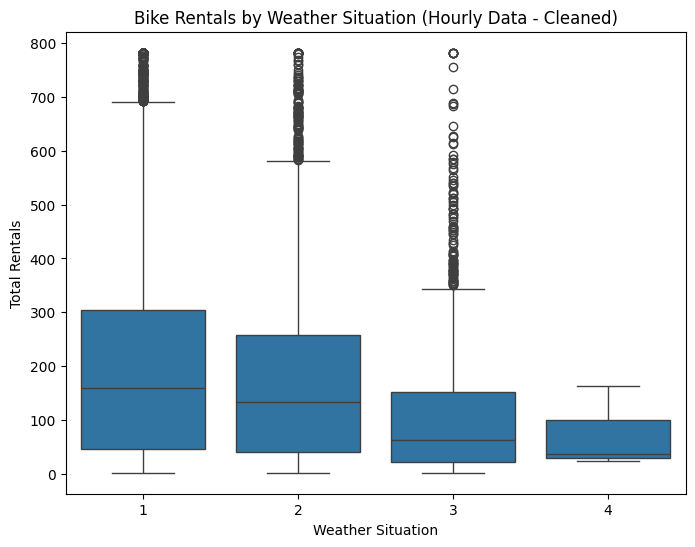

In [35]:
# Boxplot to show the distribution of rentals for each weather situation.
plt.figure(figsize=(8, 6))
sns.boxplot(data=hourly_data_cleaned, x='weathersit', y='cnt')
plt.title('Bike Rentals by Weather Situation (Hourly Data - Cleaned)')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals')
plt.show()

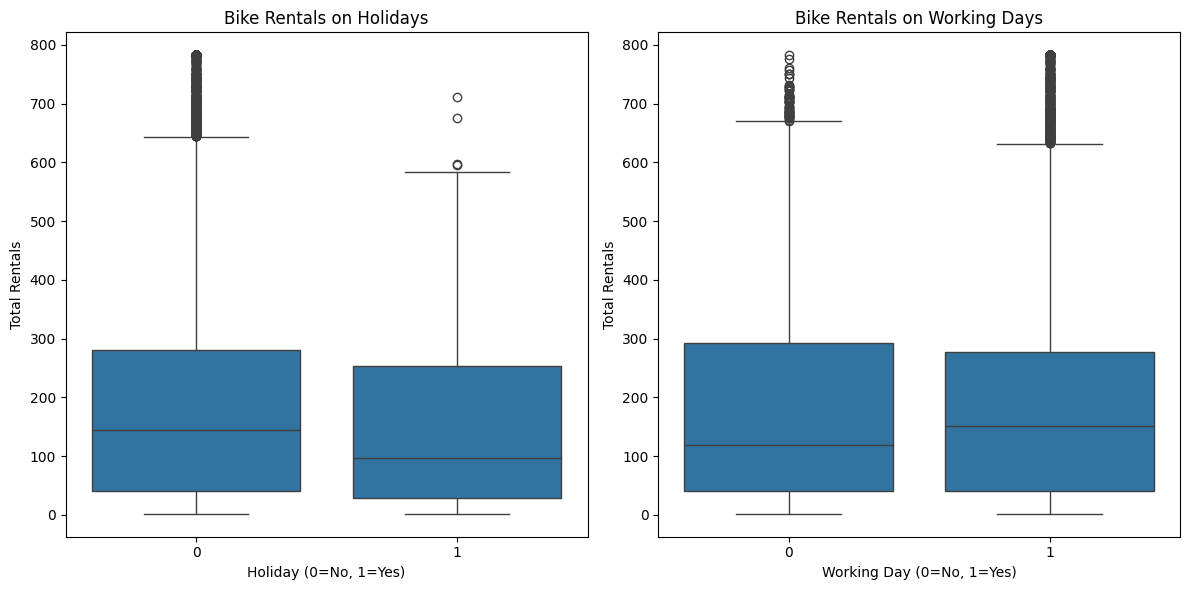

In [36]:
# Boxplots to show the distribution of rentals for holidays and working days.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=hourly_data_cleaned, x='holiday', y='cnt', ax=axes[0])
axes[0].set_title('Bike Rentals on Holidays')
axes[0].set_xlabel('Holiday (0=No, 1=Yes)')
axes[0].set_ylabel('Total Rentals')

sns.boxplot(data=hourly_data_cleaned, x='workingday', y='cnt', ax=axes[1])
axes[1].set_title('Bike Rentals on Working Days')
axes[1].set_xlabel('Working Day (0=No, 1=Yes)')
axes[1].set_ylabel('Total Rentals')

plt.tight_layout()
plt.show()

3. Exploring Relationships with Numerical Features

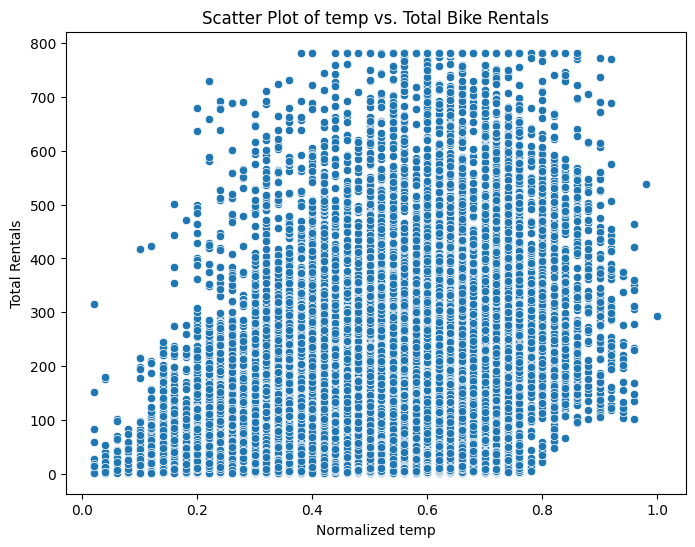

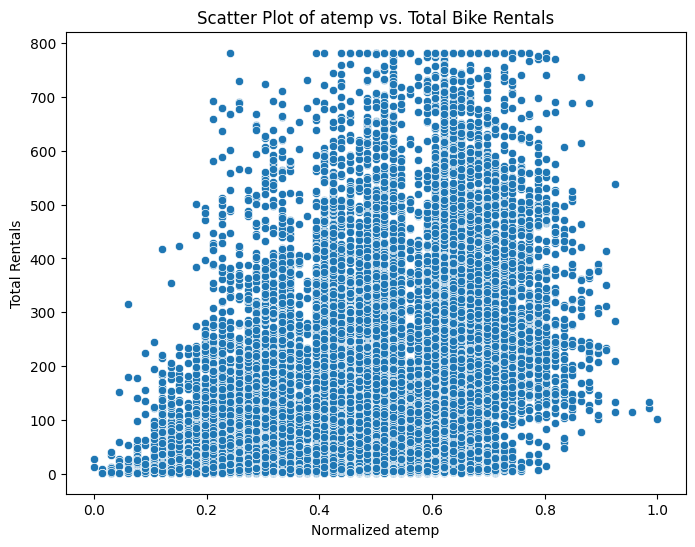

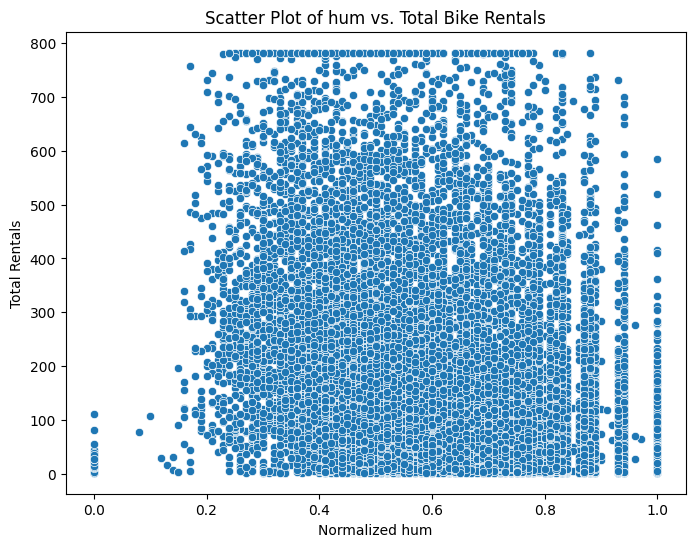

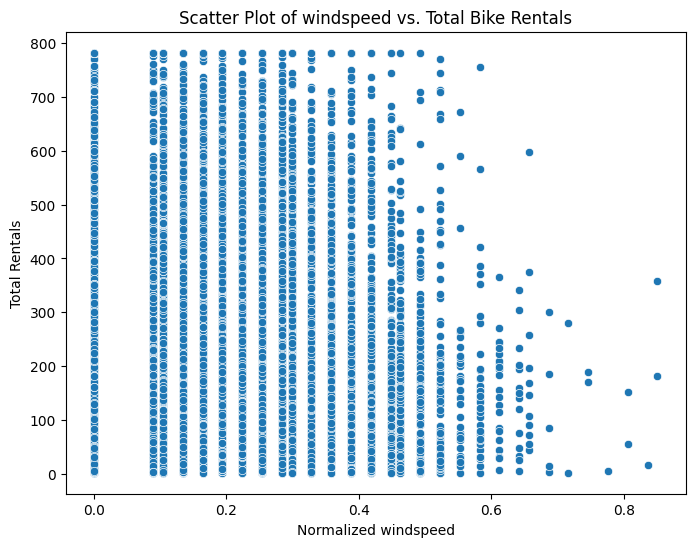

In [37]:
# Scatter plots to visualize the relationship between numerical features and 'cnt'.
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=hourly_data_cleaned, x=col, y='cnt')
    plt.title(f'Scatter Plot of {col} vs. Total Bike Rentals')
    plt.xlabel(f'Normalized {col}')
    plt.ylabel('Total Rentals')
    plt.show()

--- Question 2: Optimal Time for Increasing Bike Availability ---

1. Hourly trend visualization (using pre-calculated average)

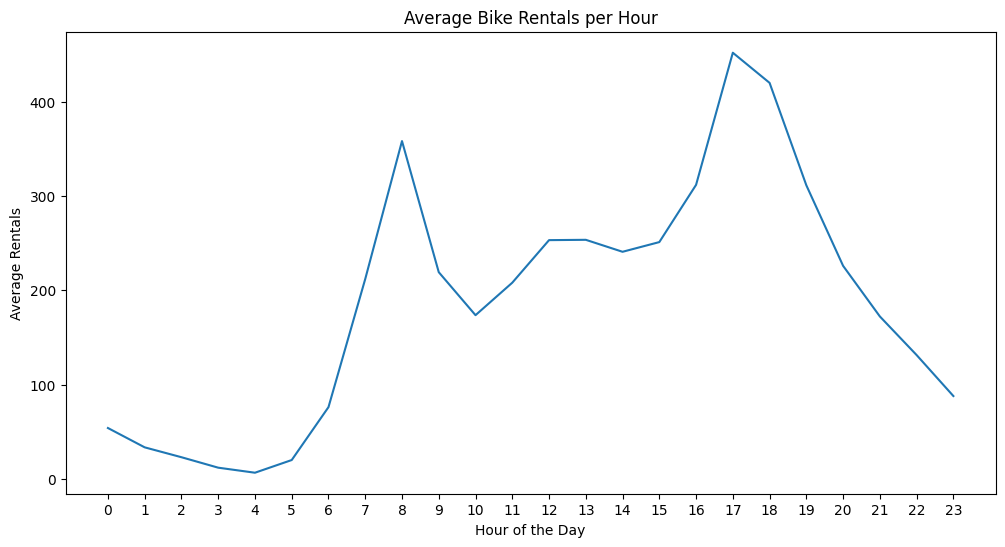

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_data_cleaned.groupby('hr')['cnt'].mean().index, hourly_data_cleaned.groupby('hr')['cnt'].mean().values) #Plot the values
plt.title('Average Bike Rentals per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.xticks(hourly_data_cleaned['hr'].unique()) 
plt.show()

2. Daily trend (using pre-calculated average from EDA step.)

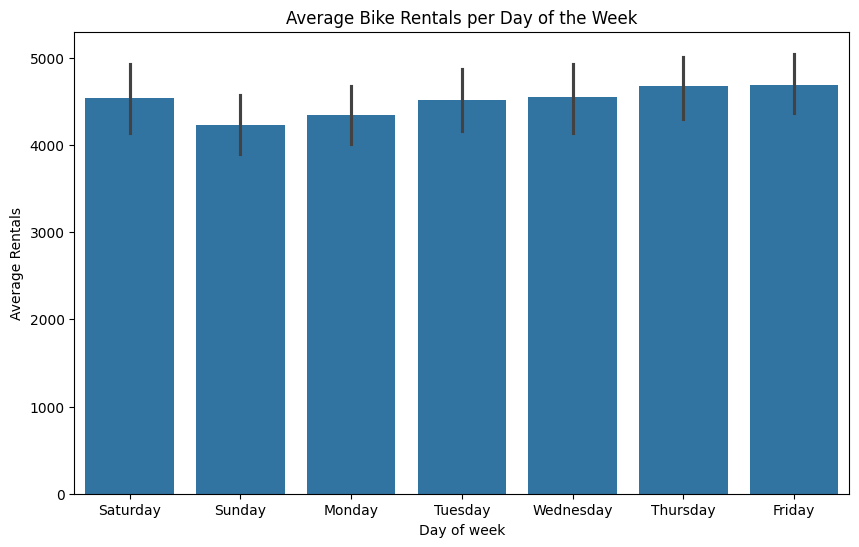

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_data_cleaned, x='day_name', y='cnt')
plt.title('Average Bike Rentals per Day of the Week')
plt.xlabel("Day of week")
plt.ylabel("Average Rentals")
plt.show()

3. Monthly trend (Using pre-calculated from EDA)

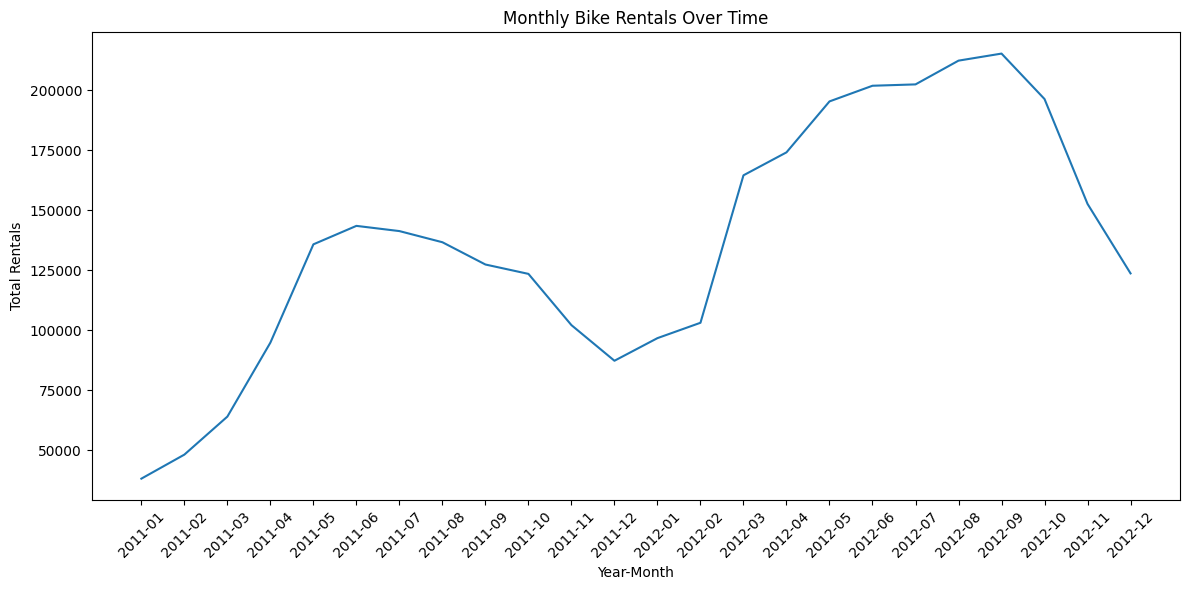

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_rentals['year_month'], monthly_rentals['cnt']) 
plt.title('Monthly Bike Rentals Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

### Advanced Analysis

#### Advanced Data Analysis

1. Average Rentals on Weekdays vs. Weekends/Holidays

In [41]:
avg_rentals_workingday = hourly_data_cleaned.groupby('workingday')['cnt'].mean().reset_index()
avg_rentals_workingday['workingday'] = avg_rentals_workingday['workingday'].map({0: 'Non-Working Day', 1: 'Working Day'})
print("\nAverage Bike Rentals (Working Day vs. Non-Working Day):")
print(avg_rentals_workingday)


Average Bike Rentals (Working Day vs. Non-Working Day):
        workingday         cnt
0  Non-Working Day  181.411538
1      Working Day  192.293558


2. Average Rentals on Holidays vs. Non-Holidays

In [42]:
avg_rentals_holiday = hourly_data_cleaned.groupby('holiday')['cnt'].mean().reset_index()
avg_rentals_holiday['holiday'] = avg_rentals_holiday['holiday'].map({0: 'Non-Holiday', 1: 'Holiday'}) #mapping
print("\nAverage Bike Rentals (Holiday vs. Non-Holiday):")
print(avg_rentals_holiday)


Average Bike Rentals (Holiday vs. Non-Holiday):
       holiday       cnt
0  Non-Holiday  189.7878
1      Holiday  156.8760


3. Adapted RFM Analysis

Due to the lack of individual rental data, the traditional RFM approach is adjusted as follows:
- Recency: The number of hours elapsed since the start of the dataset (or alternatively, since the beginning of a specific period).
- Frequency: The number of bike rentals per hour (cnt).
- Monetary: The total number of rentals (cnt) is used as a proxy for value, assuming that a higher rental count reflects greater overall significance.

In [43]:
hourly_data_cleaned['recency'] = (hourly_data_cleaned['dteday'] - hourly_data_cleaned['dteday'].min()).dt.total_seconds() / 3600
hourly_data_cleaned['recency'] += hourly_data_cleaned['hr']

hourly_data_cleaned['R_score'] = pd.qcut(hourly_data_cleaned['recency'], 4, labels=[4, 3, 2, 1]) 
hourly_data_cleaned['F_score'] = pd.qcut(hourly_data_cleaned['cnt'], 4, labels=[1, 2, 3, 4])
hourly_data_cleaned['M_score'] = pd.qcut(hourly_data_cleaned['cnt'], 4, labels=[1, 2, 3, 4])

hourly_data_cleaned['RFM_score'] = hourly_data_cleaned['R_score'].astype(str) + hourly_data_cleaned['F_score'].astype(str) + hourly_data_cleaned['M_score'].astype(str)

print("\nExample RFM Score (First 5 Rows):")
print(hourly_data_cleaned[['dteday', 'hr', 'cnt', 'R_score', 'F_score', 'M_score', 'RFM_score']].head())


Example RFM Score (First 5 Rows):
      dteday  hr   cnt R_score F_score M_score RFM_score
0 2011-01-01   0  16.0       4       1       1       411
1 2011-01-01   1  40.0       4       1       1       411
2 2011-01-01   2  32.0       4       1       1       411
3 2011-01-01   3  13.0       4       1       1       411
4 2011-01-01   4   2.0       4       1       1       411


4. Simple Clustering (Manual Grouping)  

Hours will be categorized based on rental patterns:  
- **Low**: `cnt` below the mean minus the standard deviation  
- **Moderate**: `cnt` around the mean ± standard deviation  
- **High**: `cnt` above the mean plus the standard deviation

In [44]:
# Calculate mean and standard deviation of bike rentals
mean_cnt = hourly_data_cleaned['cnt'].mean()
std_cnt = hourly_data_cleaned['cnt'].std()

In [45]:
# Function to categorize demand level
def categorize_demand(cnt):
    if cnt < mean_cnt - std_cnt:
        return 'Low'
    elif cnt > mean_cnt + std_cnt:
        return 'High'
    else:
        return 'Moderate'

In [46]:
# Apply the function to categorize each hourly record
hourly_data_cleaned['demand_level'] = hourly_data_cleaned['cnt'].apply(categorize_demand)

In [47]:
# Display sample data with the new 'demand_level' column
print("\nSample data with 'demand_level' column:")
print(hourly_data_cleaned[['hr', 'cnt', 'demand_level']].head())


Sample data with 'demand_level' column:
   hr   cnt demand_level
0   0  16.0     Moderate
1   1  40.0     Moderate
2   2  32.0     Moderate
3   3  13.0     Moderate
4   4   2.0          Low


In [48]:
# Count the number of occurrences for each demand level
demand_counts = hourly_data_cleaned['demand_level'].value_counts()
print("\nValue Counts for 'demand_level':")
print(demand_counts)


Value Counts for 'demand_level':
demand_level
Moderate    12825
High         2729
Low          1825
Name: count, dtype: int64


#### Advanced Data Visualization

--- Geospatial Analysis ---
1. Value Counts per categorical feature

In [49]:
categorical_features = ['season','holiday','workingday', 'weathersit']
for col in categorical_features:
    if col in hourly_data_cleaned.columns:
      print(f"\nValue Counts for {col} (Hourly Data):")
      print(hourly_data_cleaned[col].value_counts())


Value Counts for season (Hourly Data):
season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

Value Counts for holiday (Hourly Data):
holiday
0    16879
1      500
Name: count, dtype: int64

Value Counts for workingday (Hourly Data):
workingday
1    11865
0     5514
Name: count, dtype: int64

Value Counts for weathersit (Hourly Data):
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64


2. Data Aggregation Based on Season and Weather Condition  

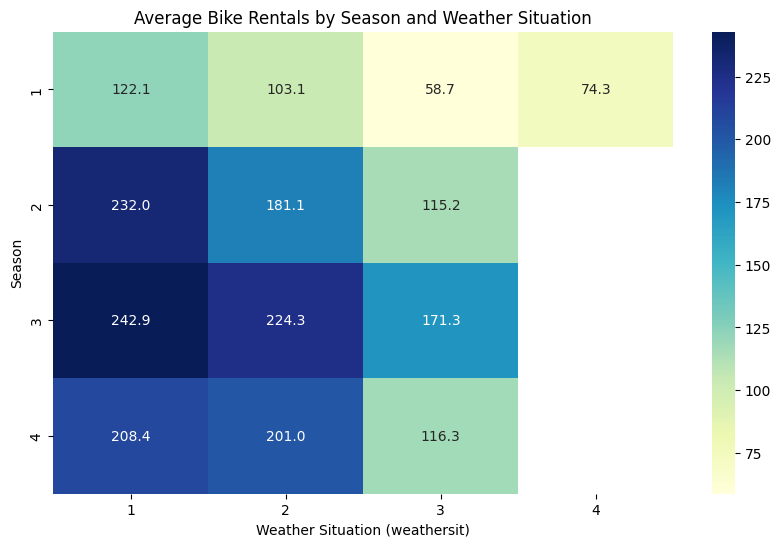

In [50]:
seasonal_weather_data = hourly_data_cleaned.groupby(['season', 'weathersit'])['cnt'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(seasonal_weather_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average Bike Rentals by Season and Weather Situation')
plt.xlabel('Weather Situation (weathersit)')
plt.ylabel('Season')
plt.show()

3. Simple Clustering (Manual Grouping)  
Adding Visualization for `demand_level` 

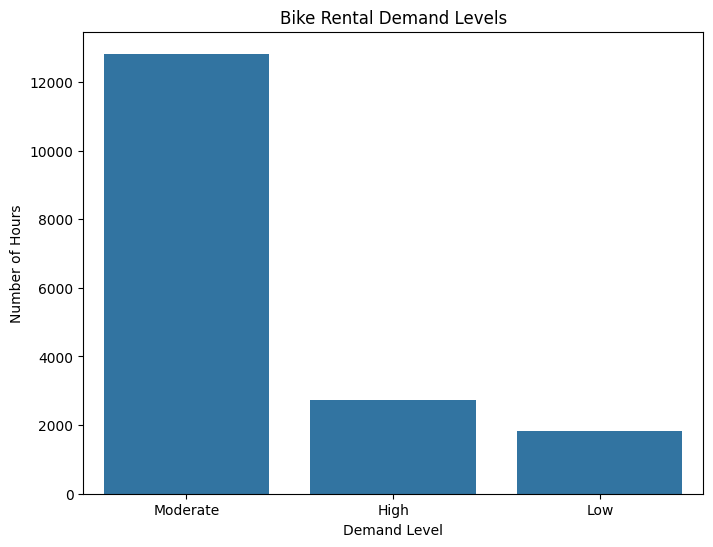

In [51]:
demand_counts = hourly_data_cleaned['demand_level'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=demand_counts.index, y=demand_counts.values)
plt.title('Bike Rental Demand Levels')
plt.xlabel('Demand Level')
plt.ylabel('Number of Hours')
plt.show()

--- Additional Visualization ---

Boxplots workingday vs noworking day

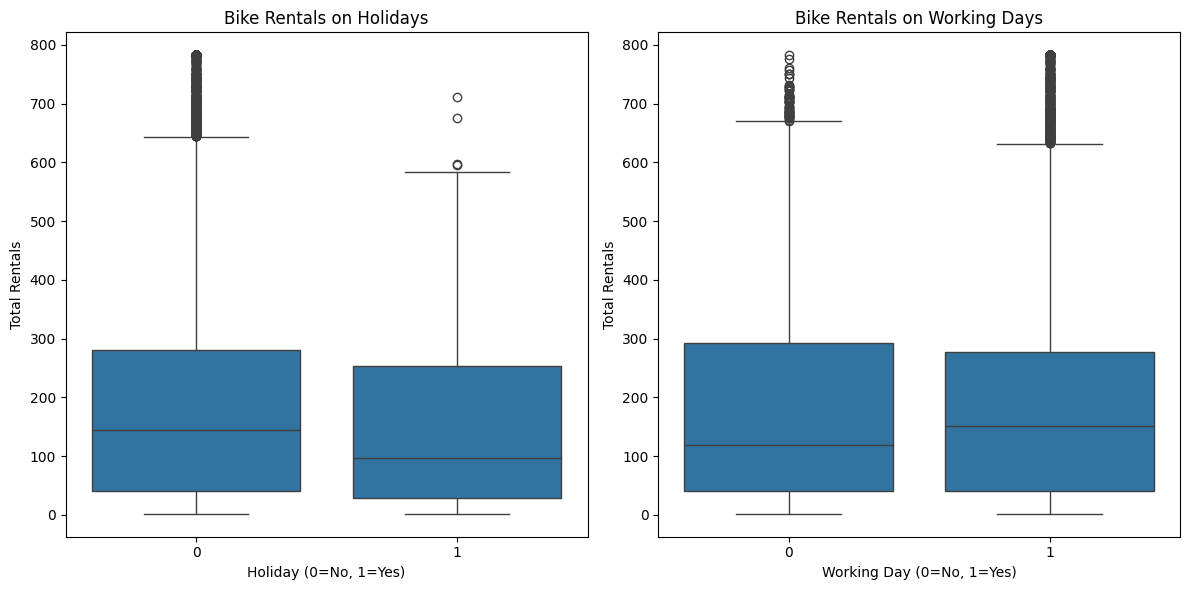

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=hourly_data_cleaned, x='holiday', y='cnt', ax=axes[0])
axes[0].set_title('Bike Rentals on Holidays')
axes[0].set_xlabel('Holiday (0=No, 1=Yes)')
axes[0].set_ylabel('Total Rentals')

sns.boxplot(data=hourly_data_cleaned, x='workingday', y='cnt', ax=axes[1])
axes[1].set_title('Bike Rentals on Working Days')
axes[1].set_xlabel('Working Day (0=No, 1=Yes)')
axes[1].set_ylabel('Total Rentals')

plt.tight_layout()
plt.show()

Monthly trend (Using pre-calculated from EDA)

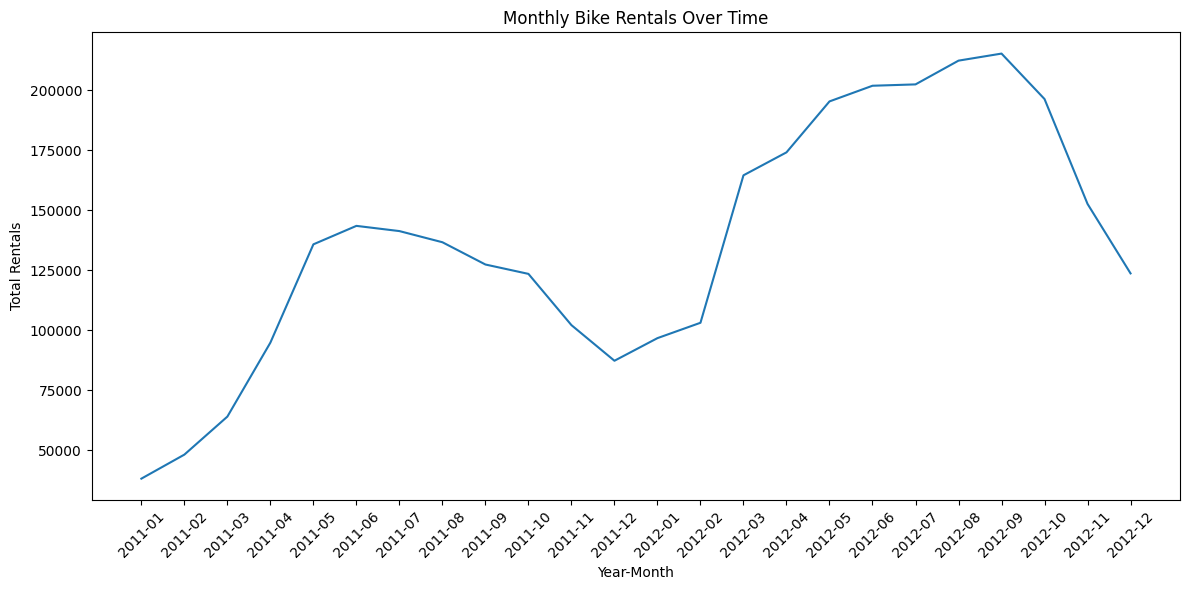

In [53]:
monthly_rentals = hourly_data_cleaned.groupby('year_month')['cnt'].sum().reset_index()
monthly_rentals['year_month'] = monthly_rentals['year_month'].astype(str)
plt.figure(figsize=(12, 6))
plt.plot(monthly_rentals['year_month'], monthly_rentals['cnt'])
plt.title('Monthly Bike Rentals Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Conclustion

#### Question 1

What factors contribute to the number of bike rentals, and how do they impact rental rates?

*   **Strongly Correlated Variables:**
    *   The total number of bike rentals (`cnt`) is strongly influenced by the number of registered users (`registered`) and casual users (`casual`). This is an inherent relationship, as `cnt` is the sum of these two variables.
    *   Temperature (`temp` and `atemp`) shows a significant positive correlation with bike rentals.  Higher temperatures (within a reasonable range, and after outlier handling) are associated with increased demand.

*   **Weakly to Moderately Correlated Variables:**
    *   Humidity (`hum`) exhibits a negative correlation, suggesting that higher humidity slightly decreases the desire to rent bikes.
    *   Wind speed (`windspeed`) shows a weak negative correlation, indicating a minor influence on reducing demand.

*   **Temporal Patterns:**
    *   **Daily:** Weekdays show higher rental demand compared to weekends/holidays. National holidays also demonstrate reduced demand.
    *   **Hourly:**  Two daily peaks in demand are evident: around 8 AM (commuting to work/school) and 5-6 PM (returning from work/school).
    *   **Seasonal:** Demand is highest during the fall, followed by summer. Spring has the lowest demand.
    * **Monthly:** The data analysis reveals monthly data trends.

*   **Weather Condition Influence:**
    *   Clear weather conditions tend to stimulate higher bike rental demand.

#### Question 2

Based on demand patterns, when is the optimal time to increase the number of bikes?

*   **Hourly:** The optimal times to increase bike availability are during peak hours, specifically around 8 AM and 5-6 PM, coinciding with commute times.
*   **Daily:** Weekdays consistently show higher demand, making them the primary focus for increased bike availability.
*   **Seasonally:** Fall and summer are the periods with the highest demand, prioritizing bike availability during these seasons.

#### Additional Analyses

 *   **Adapted RFM Analysis:**  The Recency, Frequency, Monetary (RFM) concept was adapted for the hourly data, as individual customer transaction data was unavailable.  *Recency* was calculated based on the time elapsed since the beginning of the dataset, *Frequency* was represented by the `cnt` variable (number of rentals per hour), and *Monetary* was also proxied by `cnt`.  RFM scoring was performed using a simple quartile-based method.
*   **Simple Clustering:**  A basic clustering approach, based on the mean and standard deviation of `cnt`, categorized each hour into "Low Demand," "Medium Demand," or "High Demand" levels. This provides a general overview of demand patterns.
* **Geospatial Analysis:** the absence of geographic location data, the analysis was replaced by correlating between the season and weather conditions, providing an overview of how environmental factors affect demand.


#### Overall Conclusion

The bike-sharing dataset provides rich information for analysis. Time-related factors (hour, day, month, year) and weather conditions significantly influence bike rental demand.  Understanding these patterns is crucial for optimizing bike-sharing system operations.